# Assignment04
* 2019220177 Seungwook Oh

## Initial Setting

### Mount Google Drive


In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%cd /content/drive/My\ Drive/MIMP

/content/drive/My Drive/MIMP


### git Setting

In [5]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   Assignment04/Assignment04.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	Assignment05/

no changes added to commit (use "git add" and/or "git commit -a")


In [0]:
!git config --global user.email "sooonchang@gmail.com"
!git config --global user.name "SooonChang"

In [7]:
!git add .
!git commit -m "Assignment05 : Init"
!git push origin master

[master 7bb7847] Assignment05 : Init
 3 files changed, 102 insertions(+), 1 deletion(-)
 create mode 100644 Assignment05/Assignment05.ipynb
 create mode 100644 Assignment05/data.txt
Counting objects: 7, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 4.15 KiB | 849.00 KiB/s, done.
Total 7 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/SooonChang/MIMP
   b92656f..7bb7847  master -> master


## 1. Plot the training data
* plot the training data points(x,y) with their els l in colors(blue for label 0 and red for label 1)

### import Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data = np.genfromtxt("./Assignment05/data.txt",delimiter=',')
x = data[:,0]
y = data[:,1]
label = data[:,2]

x_label0 = x[label == 0]
x_label1 = x[label == 1]
y_label0 = y[label == 0]
y_label1 = y[label == 1]

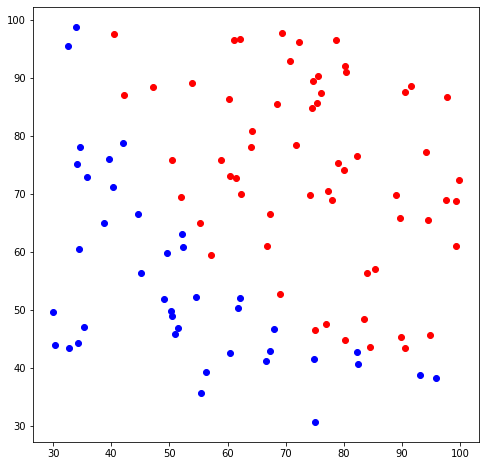

In [43]:
plt.figure(figsize=(8,8))
plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1, c='r')
plt.show()

### git commit

In [21]:
!git add .
!git commit -m "Assignment05: 1.Plot the training data"
!git push origin master

[master 0fe7811] Assignment05: 1.Plot the training data
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Assignment05/Assignment05.ipynb (98%)
Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 12.45 KiB | 3.11 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0)
To https://github.com/SooonChang/MIMP
   7bb7847..0fe7811  master -> master


## 2.Plot the estimated Parameters
* plot the estimated parameters $(\theta_0, \theta_1, \theta_2)$ at every iteration of gradient descent until convergence
* the colors for the parameters $(\theta_0, \theta_1, \theta_2)$ shoud be red, green, blue, respectively

In [0]:
def sigmoid(x):

  return 1/(1+ np.exp(-x))

class Logistic_regression():

  def __init__(self, eta = 0.0001, n_iterations = 10000):
    self.eta = eta
    self.n_iterations = n_iterations

  def fit(self, x, y, label):
    self.cost_ = []
    self.w0_ = []
    self.w1_ = []
    self.w2_ = []

    np.random.seed()
    self.w0 = np.random.randn(1)
    self.w1 = np.random.randn(1)
    self.w2 = np.random.randn(1)

    m = x.shape[0]
    delta = 1e-7 # Prevent diverge

    for i in range(self.n_iterations):
      z = self.w0 +self.w1*x + self.w2*y
      sigma_z = sigmoid(z)
      
      cost = np.sum(-label*np.log(sigma_z + delta) - (1-label)*np.log(1-sigma_z+delta))
      cost /=m
      self.cost_.append(cost)
      self.w0_.append(self.w0)
      self.w1_.append(self.w1)
      self.w2_.append(self.w2)

      self.w0 -= (self.eta/m)*np.sum(sigma_z -label)
      self.w1 -= (self.eta/m)*np.dot((sigma_z-label).T, x)
      self.w2 -= (self.eta/m)*np.dot((sigma_z-label).T, y)
    return self

  def parameters(self):

      return self.cost_, self.w0_, self.w1_, self.w2_


In [0]:
eta = 0.0001
iteration = 10000
logistic = Logistic_regression(eta=eta, n_iterations= iteration)

In [217]:
logistic.fit(x,y,label)

In [0]:
cost, w0, w1, w2 = logistic.parameters()

### Plot the parameters

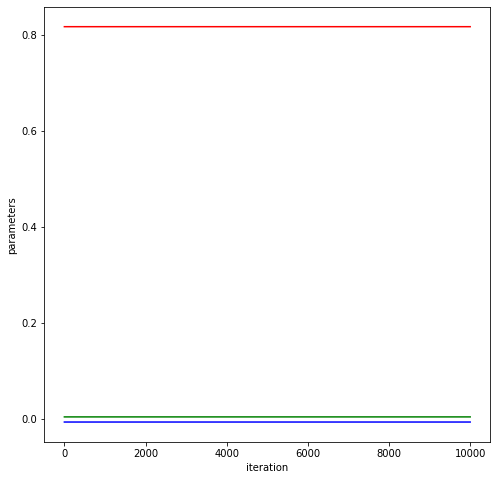

In [220]:
n = np.arange(0,iteration,1)
plt.figure(figsize=(8,8))
plt.xlabel("iteration")
plt.ylabel("parameters")
plt.plot(n,w0,c='r')
plt.plot(n,w1,c='g')
plt.plot(n,w2,c='b')
plt.show()

### git commit

In [222]:
!git add .
!git commit -m "Assignment05: 2. Plot the estimated parameters"
!git push origin master

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
	modified:   Assignment05/Assignment05.ipynb

no changes added to commit
Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 6.84 KiB | 1.37 MiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/SooonChang/MIMP
   0fe7811..2773c34  master -> master


## 3. Plot the training Error
* plot the training error $J(\theta_0,\theta_21,\theta_2)$ at every iteration of gradient descent until convergence (in blue color)

### plot the training error

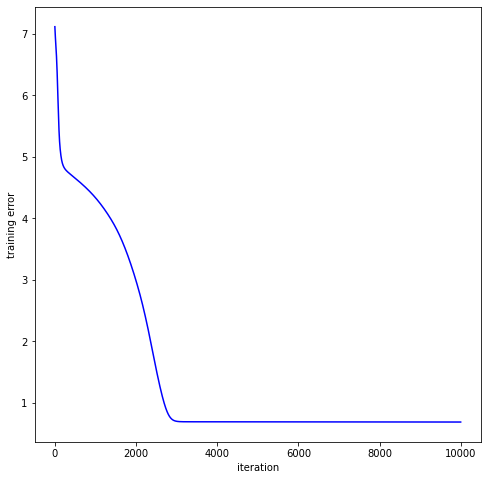

In [223]:
plt.figure(figsize=(8,8))
plt.xlabel("iteration")
plt.ylabel("training error")
plt.plot(n,cost,c='b')
plt.show()

In [0]:
!git add .
!git commit -m "Assiagnment05: 3. Plot the training error"
!git push origin master

[master b519e06] Assiagnment05: 3. Plot the training error
 1 file changed, 1 insertion(+), 1 deletion(-)
